# AMAZON SALES DATA ANALYSIS


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [22]:
sales_data=pd.read_csv('D:/salesdata.csv') 

In [23]:
sales_data.head(5)

,Custkey,DateKey,Discount_Amount,Invoice_Date,Invoice_Number,Item_Class,Item_Number,Item,Line_Number,List_Price,Order_Number,Promised_Delivery_Date,Sales_Amount,Sales_Amount_Based_on_List_Price,Sales_Cost_Amount,Sales_Margin_Amount,Sales_Price,Sales_Quantity,Sales_Rep,Units_Of_Measure
0,10016609,12/31/2019,398.73,31-12-2019,329568,P01,15640,Super Vegetable Oil,1000,163.47,122380,12/31/2019,418.62,817.35,102.99,315.63,83.72400,5,176,EA
1,10016609,12/31/2019,268.67,31-12-2019,329569,P01,31681,Golden Fajita French Fries,7000,275.37,123966,12/31/2019,282.07,550.74,117.45,164.62,141.03500,2,176,EA
2,10016609,12/31/2019,398.73,31-12-2019,329569,P01,15640,Super Vegetable Oil,4000,163.47,123966,12/31/2019,418.62,817.35,102.99,315.63,83.72400,5,176,EA
3,10016609,12/31/2019,466.45,31-12-2019,329569,P01,13447,High Top Oranges,3000,119.52,123966,12/31/2019,489.71,956.16,213.29,276.42,61.21375,8,176,EA
4,10016609,12/31/2019,515.51,31-12-2019,329569,P01,36942,Tell Tale New Potatos,9000,264.18,123966,12/31/2019,541.21,1056.72,290.56,250.65,135.30250,4,176,EA


In [24]:
sales_data.shape

(65280, 20)

In [25]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount_Amount                   65278 non-null  float64
 3   Invoice_Date                      65280 non-null  object 
 4   Invoice_Number                    65280 non-null  int64  
 5   Item_Class                        56995 non-null  object 
 6   Item_Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line_Number                       65280 non-null  int64  
 9   List_Price                        65280 non-null  float64
 10  Order_Number                      65280 non-null  int64  
 11  Promised_Delivery_Date            65280 non-null  object 
 12  Sale

In [26]:
#Changing the data type of the columns

sales_data['DateKey']=pd.to_datetime(sales_data['DateKey'])
sales_data['Invoice_Date']=pd.to_datetime(sales_data['Invoice_Date'])

sales_data['Promised_Delivery_Date']=pd.to_datetime(sales_data['Promised_Delivery_Date'])


C:\Users\hp\AppData\Local\Temp\ipykernel_15656\635586568.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Invoice_Date']=pd.to_datetime(sales_data['Invoice_Date'])


In [27]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           65280 non-null  int64         
 1   DateKey                           65280 non-null  datetime64[ns]
 2   Discount_Amount                   65278 non-null  float64       
 3   Invoice_Date                      65280 non-null  datetime64[ns]
 4   Invoice_Number                    65280 non-null  int64         
 5   Item_Class                        56995 non-null  object        
 6   Item_Number                       65240 non-null  object        
 7   Item                              65280 non-null  object        
 8   Line_Number                       65280 non-null  int64         
 9   List_Price                        65280 non-null  float64       
 10  Order_Number                      65280 non-nu

In [28]:
sales_data.columns

Index(['Custkey', 'DateKey', 'Discount_Amount', 'Invoice_Date',
       'Invoice_Number', 'Item_Class', 'Item_Number', 'Item', 'Line_Number',
       'List_Price', 'Order_Number', 'Promised_Delivery_Date', 'Sales_Amount',
       'Sales_Amount_Based_on_List_Price', 'Sales_Cost_Amount',
       'Sales_Margin_Amount', 'Sales_Price', 'Sales_Quantity', 'Sales_Rep',
       'Units_Of_Measure '],
      dtype='object')

In [29]:
sales_data.isnull().sum()

Custkey                                0
DateKey                                0
Discount_Amount                        2
Invoice_Date                           0
Invoice_Number                         0
Item_Class                          8285
Item_Number                           40
Item                                   0
Line_Number                            0
List_Price                             0
Order_Number                           0
Promised_Delivery_Date                 0
Sales_Amount                           0
Sales_Amount_Based_on_List_Price       0
Sales_Cost_Amount                      0
Sales_Margin_Amount                    0
Sales_Price                            1
Sales_Quantity                         0
Sales_Rep                              0
Units_Of_Measure                       0
dtype: int64

In [30]:
sales_data1=sales_data.copy()

In [31]:
sales_data1.Item_Class.value_counts()

P01    56965
PO1       16
P02        1
P12        1
P13        1
P06        1
P15        1
P11        1
P08        1
P07        1
P10        1
P09        1
P14        1
P03        1
P05        1
P04        1
Name: Item_Class, dtype: int64

In [32]:
sales_data1.describe().round()

,Custkey,Discount_Amount,Invoice_Number,Line_Number,List_Price,Order_Number,Sales_Amount,Sales_Amount_Based_on_List_Price,Sales_Cost_Amount,Sales_Margin_Amount,Sales_Price,Sales_Quantity,Sales_Rep
count,65280.0,65278.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65279.0,65280.0,65280.0
mean,10017703.0,1856.0,216227.0,23715.0,515.0,180582.0,2852.0,4708.0,1661.0,1191.0,284.0,45.0,137.0
std,7176.0,9037.0,94992.0,32664.0,449.0,67595.0,15165.0,20697.0,9557.0,5861.0,253.0,430.0,27.0
min,10000453.0,-255821.0,100080.0,1000.0,0.0,100838.0,200.0,0.0,0.0,-3933.0,-5000.0,-1.0,103.0
25%,10012715.0,246.0,117931.0,3000.0,182.0,115320.0,308.0,561.0,168.0,130.0,100.0,2.0,113.0
50%,10019665.0,442.0,222870.0,12000.0,325.0,203702.0,554.0,998.0,305.0,246.0,184.0,3.0,134.0
75%,10023511.0,1000.0,314319.0,32000.0,804.0,218576.0,1280.0,2317.0,687.0,580.0,448.0,8.0,160.0
max,10027583.0,343533.0,332842.0,344000.0,2761.0,321532.0,555376.0,632610.0,366576.0,188800.0,6035.0,16000.0,185.0


In [46]:
#Adding Some more columns 
#Extracting day,year,month from column Invoice Date
sales_data1['Invoice_Year']=sales_data1['Invoice_Date'].dt.year
sales_data1['Invoice_Month']=sales_data1['Invoice_Date'].dt.month
sales_data1['Invoice_Quarter']=sales_data1['Invoice_Date'].dt.quarter
sales_data1['Invoice_Day']=sales_data1['Invoice_Date'].dt.day

In [47]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           65280 non-null  int64         
 1   DateKey                           65280 non-null  datetime64[ns]
 2   Discount_Amount                   65278 non-null  float64       
 3   Invoice_Date                      65280 non-null  datetime64[ns]
 4   Invoice_Number                    65280 non-null  int64         
 5   Item_Class                        56995 non-null  object        
 6   Item_Number                       65240 non-null  object        
 7   Item                              65280 non-null  object        
 8   Line_Number                       65280 non-null  int64         
 9   List_Price                        65280 non-null  float64       
 10  Order_Number                      65280 non-nu

In [48]:
#making new Dataframe with necessary columns
sales_data2 = sales_data1[['Custkey', 'Item','Invoice_Date','Invoice_Year','Invoice_Quarter','Invoice_Month','Invoice_Day',
                          'Sales_Quantity','Sales_Amount','Sales_Amount_Based_on_List_Price','Discount_Amount','Sales_Margin_Amount',
                          'Sales_Cost_Amount','Sales_Rep','Units_Of_Measure ','List_Price','Sales_Price']]


In [49]:
sales_data2.isnull().sum()

Custkey                             0
Item                                0
Invoice_Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales_Quantity                      0
Sales_Amount                        0
Sales_Amount_Based_on_List_Price    0
Discount_Amount                     2
Sales_Margin_Amount                 0
Sales_Cost_Amount                   0
Sales_Rep                           0
Units_Of_Measure                    0
List_Price                          0
Sales_Price                         1
dtype: int64

In [50]:
sales_data2.dropna(subset=(['Discount_Amount','Sales_Price' ]),axis=0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15656\575165486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2.dropna(subset=(['Discount_Amount','Sales_Price' ]),axis=0,inplace=True)


In [51]:
sales_data2.isnull().sum()

Custkey                             0
Item                                0
Invoice_Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales_Quantity                      0
Sales_Amount                        0
Sales_Amount_Based_on_List_Price    0
Discount_Amount                     0
Sales_Margin_Amount                 0
Sales_Cost_Amount                   0
Sales_Rep                           0
Units_Of_Measure                    0
List_Price                          0
Sales_Price                         0
dtype: int64

In [52]:
sales_data2.head()

,Custkey,Item,Invoice_Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales_Quantity,Sales_Amount,Sales_Amount_Based_on_List_Price,Discount_Amount,Sales_Margin_Amount,Sales_Cost_Amount,Sales_Rep,Units_Of_Measure,List_Price,Sales_Price
0,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
1,10016609,Golden Fajita French Fries,2019-12-31,2019,4,12,31,2,282.07,550.74,268.67,164.62,117.45,176,EA,275.37,141.03500
2,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
3,10016609,High Top Oranges,2019-12-31,2019,4,12,31,8,489.71,956.16,466.45,276.42,213.29,176,EA,119.52,61.21375
4,10016609,Tell Tale New Potatos,2019-12-31,2019,4,12,31,4,541.21,1056.72,515.51,250.65,290.56,176,EA,264.18,135.30250


In [53]:
sales_data2.shape


(65278, 17)

In [54]:
sales_data2[sales_data2.duplicated(keep=False)]

,Custkey,Item,Invoice_Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales_Quantity,Sales_Amount,Sales_Amount_Based_on_List_Price,Discount_Amount,Sales_Margin_Amount,Sales_Cost_Amount,Sales_Rep,Units_Of_Measure,List_Price,Sales_Price
0,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.3500,398.7300,315.63,102.99,176,EA,163.4700,83.724
2,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.3500,398.7300,315.63,102.99,176,EA,163.4700,83.724
173,10019400,Best Choice Graham Crackers,2019-12-30,2019,4,12,30,2,1055.03,2059.9600,1004.9300,441.39,613.64,119,EA,1029.9800,527.515
185,10019400,Best Choice Graham Crackers,2019-12-30,2019,4,12,30,2,1055.03,2059.9600,1004.9300,441.39,613.64,119,EA,1029.9800,527.515
454,10019194,Ebony Squash,2019-12-29,2019,4,12,29,2,1045.54,2117.3602,1071.8202,438.46,607.08,108,EA,1058.6801,522.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65033,10019194,Urban Small Eggs,2017-03-01,2017,1,3,1,2,281.65,570.3800,288.7300,122.95,158.70,108,EA,285.1900,140.825
65252,10009669,Gorilla Chocolate Milk,2017-01-01,2017,1,1,1,1,240.98,301.2300,60.2500,133.21,107.77,170,EA,301.2300,240.980
65253,10009669,Red Spade Foot-Long Hot Dogs,2017-01-01,2017,1,1,1,1,1302.27,1627.8400,325.5700,826.52,475.75,170,EA,1627.8400,1302.270
65254,10009669,Gorilla Chocolate Milk,2017-01-01,2017,1,1,1,1,240.98,301.2300,60.2500,133.21,107.77,170,EA,301.2300,240.980


In [55]:
sales_data2.Item.value_counts()


Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
BBB Best Corn Oil                  1
Choice Bubble Gum                  1
Atomic White Chocolate Bar         1
Tell Tale Potatos                  1
Discover Rice Medly                1
Name: Item, Length: 657, dtype: int64

In [56]:
sales_data2.describe()

,Custkey,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales_Quantity,Sales_Amount,Sales_Amount_Based_on_List_Price,Discount_Amount,Sales_Margin_Amount,Sales_Cost_Amount,Sales_Rep,List_Price,Sales_Price
count,6.527800e+04,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000
mean,1.001770e+07,2017.960936,2.499357,6.538865,15.924048,45.087028,2852.123155,4707.751960,1855.628805,1191.042148,1661.081006,137.422792,514.721549,283.700703
std,7.176028e+03,0.946607,1.149151,3.519088,9.062528,429.674817,15164.794439,20697.047218,9037.273883,5860.944907,9556.769198,26.643590,449.187911,252.034171
min,1.000045e+07,2017.000000,1.000000,1.000000,1.000000,1.000000,200.010000,0.000000,-255820.800000,-3932.930000,0.000000,103.000000,0.000000,0.337341
25%,1.001272e+07,2017.000000,1.000000,3.000000,8.000000,2.000000,308.410000,561.040000,246.067500,129.942500,167.810000,113.000000,181.560000,100.070000
50%,1.001966e+07,2018.000000,3.000000,7.000000,16.000000,3.000000,553.970000,998.160000,441.760000,246.490000,304.560000,134.000000,325.190000,183.758250
75%,1.002351e+07,2019.000000,4.000000,10.000000,24.000000,8.000000,1280.042500,2319.810000,999.760000,579.530000,687.400000,160.000000,803.860000,448.220000
max,1.002758e+07,2019.000000,4.000000,12.000000,31.000000,16000.000000,555376.000000,632610.160000,343532.660000,188800.000000,366576.000000,185.000000,2760.700000,6035.000000


In [57]:
from pandas_profiling import ProfileReport

In [58]:
sales_data2[[ 'List_Price','Sales_Price','Sales_Amount_Based_on_List_Price','Sales_Amount','Discount_Amount']].head(16)


,List_Price,Sales_Price,Sales_Amount_Based_on_List_Price,Sales_Amount,Discount_Amount
0,163.4700,83.724000,817.3500,418.62,398.7300
1,275.3700,141.035000,550.7400,282.07,268.6700
2,163.4700,83.724000,817.3500,418.62,398.7300
3,119.5200,61.213750,956.1600,489.71,466.4500
4,264.1800,135.302500,1056.7200,541.21,515.5100
5,451.3100,231.142500,3610.4800,1849.14,1761.3400
6,927.9700,475.270000,3711.8800,1901.08,1810.8000
7,39.1545,37.588276,6812.8830,6540.36,272.5230
8,38.5506,37.008566,9946.0548,9548.21,397.8448
9,40.3128,38.700294,13706.3520,13158.10,548.2520


In [59]:
Yearly_Sales =  sales_data2[['Custkey','Item','Invoice_Date','Invoice_Year','Invoice_Month',
                            'Sales_Quantity', 'Sales_Amount_Based_on_List_Price','Discount_Amount',
                           'Sales_Amount', 'Sales_Margin_Amount','Sales_Cost_Amount','Sales_Rep','Units_Of_Measure ','List_Price',
                           'Sales_Price']]

C:\Users\hp\AppData\Local\Temp\ipykernel_15656\772084447.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(y='Sales_Amount',x ='Invoice_Month',data=sales_data2.groupby(['Invoice_Date','Invoice_Year','Invoice_Month']).sum(),hue='Invoice_Year',palette='bright')


<Axes: xlabel='Invoice_Month', ylabel='Sales_Amount'>

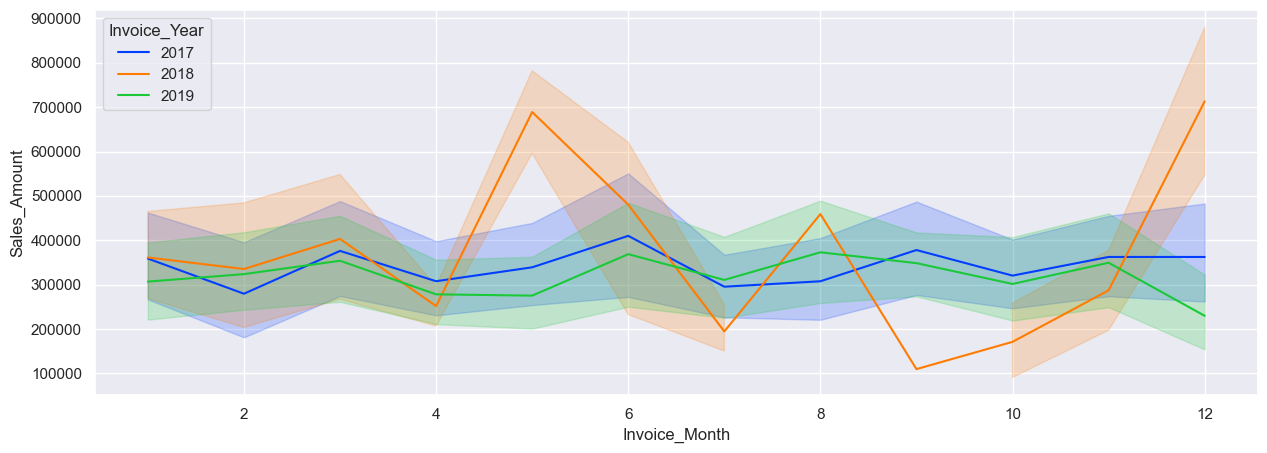

In [62]:
plt.figure(figsize=(15,5))
sns.lineplot(y='Sales_Amount',x ='Invoice_Month',data=sales_data2.groupby(['Invoice_Date','Invoice_Year','Invoice_Month']).sum(),hue='Invoice_Year',palette='bright')

From the above figure we can clearly infer that **2018 is the most successful year in terms of Sales_Amount with May 2017 month has the highest sales followed by December & August

Text(0, 0.5, 'Count')

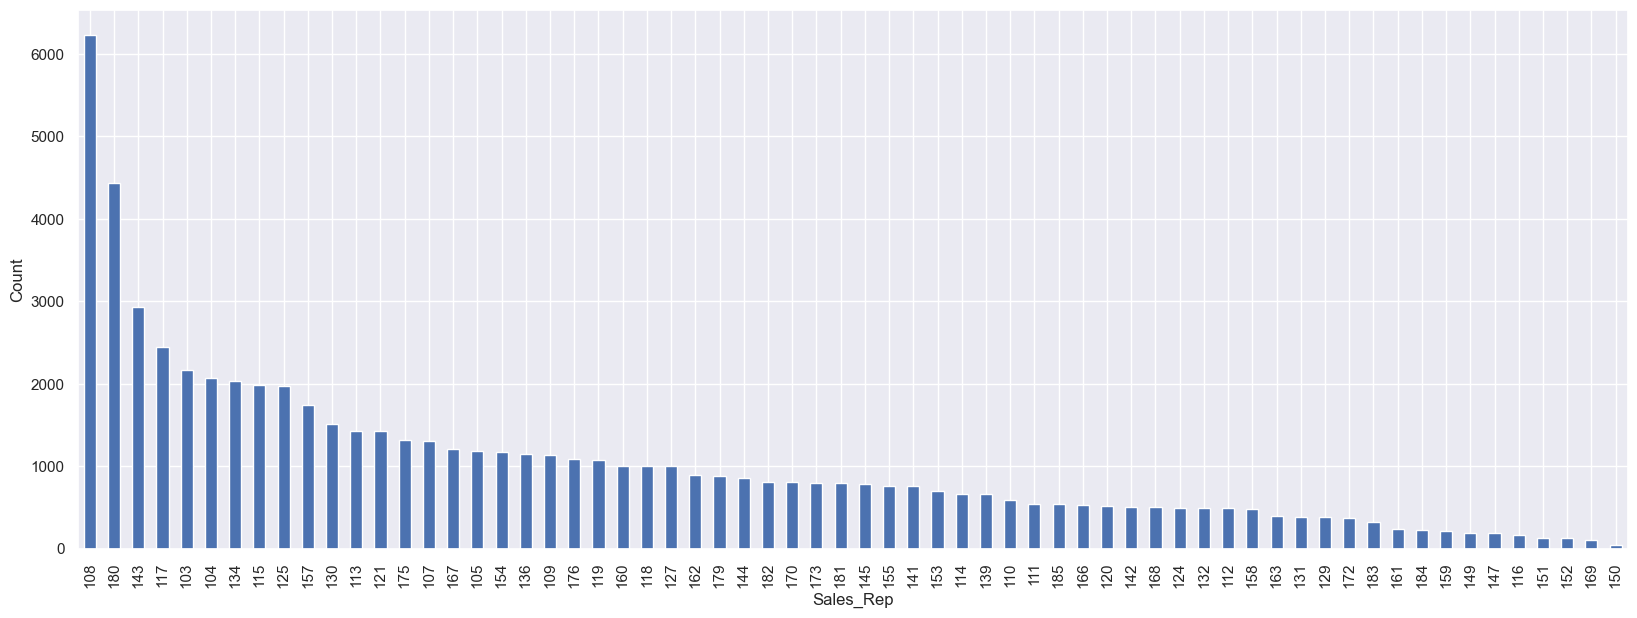

In [63]:
plt.figure(figsize=(20, 7))
sales_data2['Sales_Rep'].value_counts().plot.bar()
plt.xlabel('Sales_Rep')
plt.ylabel('Count')

**************************************************Yearly- Sales Trend**************************************************


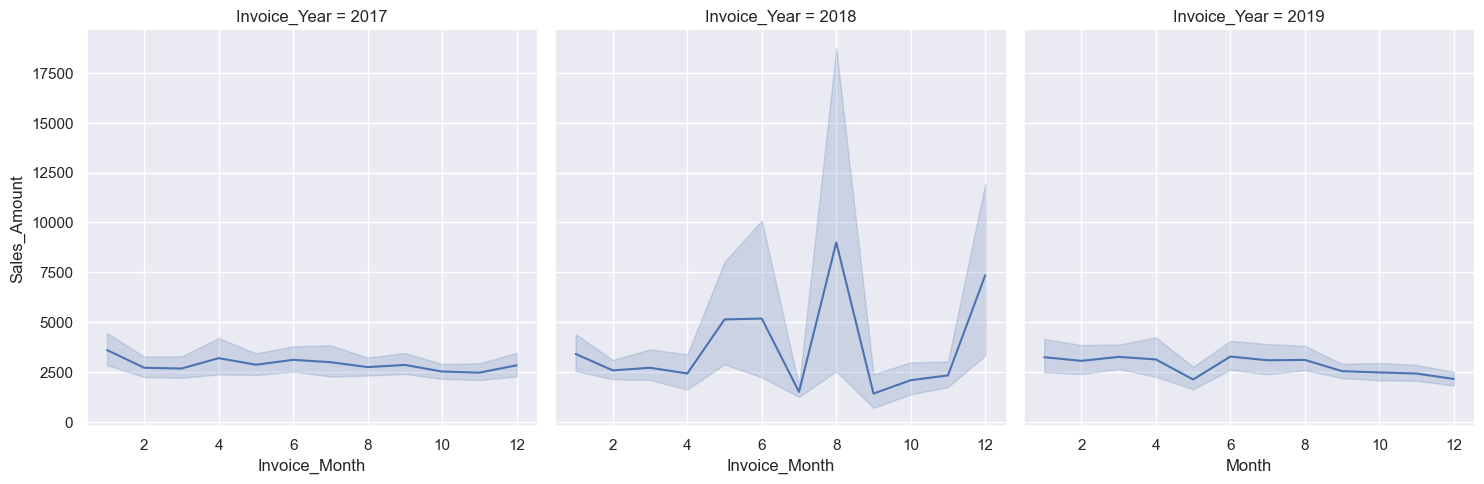

In [65]:
sns.relplot(x ='Invoice_Month',y = 'Sales_Amount', data=Yearly_Sales,height=5,
            kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*50+'Yearly- Sales Trend'+'*'*50)

,Invoice_Year,Sales_Margin_Amount
0,2019,315.63
1,2019,164.62
2,2019,315.63
3,2019,276.42
4,2019,250.65
...,...,...
65275,2017,250.68
65276,2017,368.12
65277,2017,1420.21
65278,2017,109.93


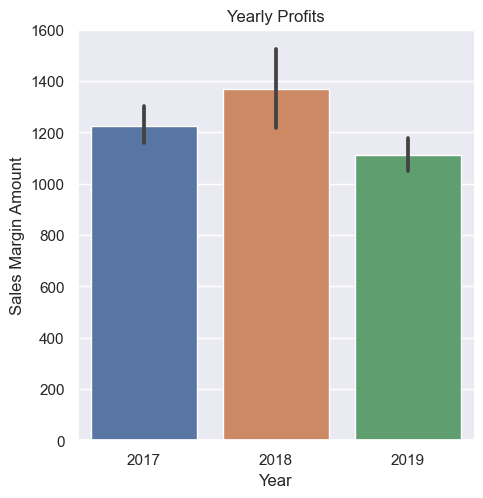

In [72]:
sns.catplot(y = 'Sales_Margin_Amount', x = 'Invoice_Year', data = Yearly_Sales,kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
Yearly_Sales[['Invoice_Year', 'Sales_Margin_Amount']]

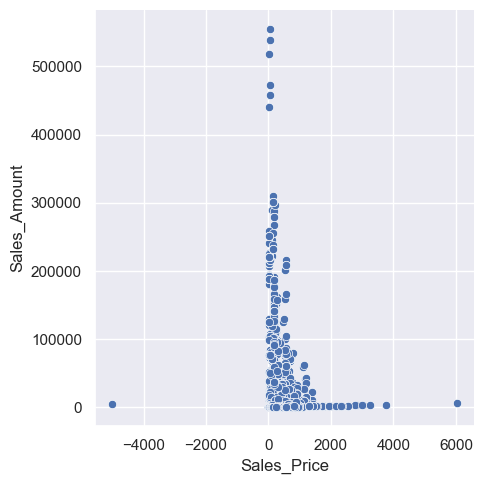

In [76]:
sns.relplot(x= 'Sales_Price', y='Sales_Amount', data= sales_data)
